# Question 1

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# Load Data (Replace with actual file paths)
data1 = pd.read_csv("https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_4/dataset_q1/data_1%20-%20data_1.csv", header=None).T  # Assuming CSV format
data2 = pd.read_csv("https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_4/dataset_q1/data_2%20-%20data_2.csv", header=None).T

def plot_correlation_matrix(corr_matrix, title, ax):
    # sorted_matrix = sort_correlation_matrix(corr_matrix)
    sns.heatmap(corr_matrix,
                cmap='RdBu_r',
                vmin=-1,
                vmax=1,
                center=0,
                square=True,
                cbar_kws={'label': 'Correlation'},
                ax=ax,
                xticklabels=1,
                yticklabels=1)
    labels = corr_matrix.index

    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=45, ha='right')

    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_yticklabels(labels, rotation=0)

    ax.set_title(title, pad=20)

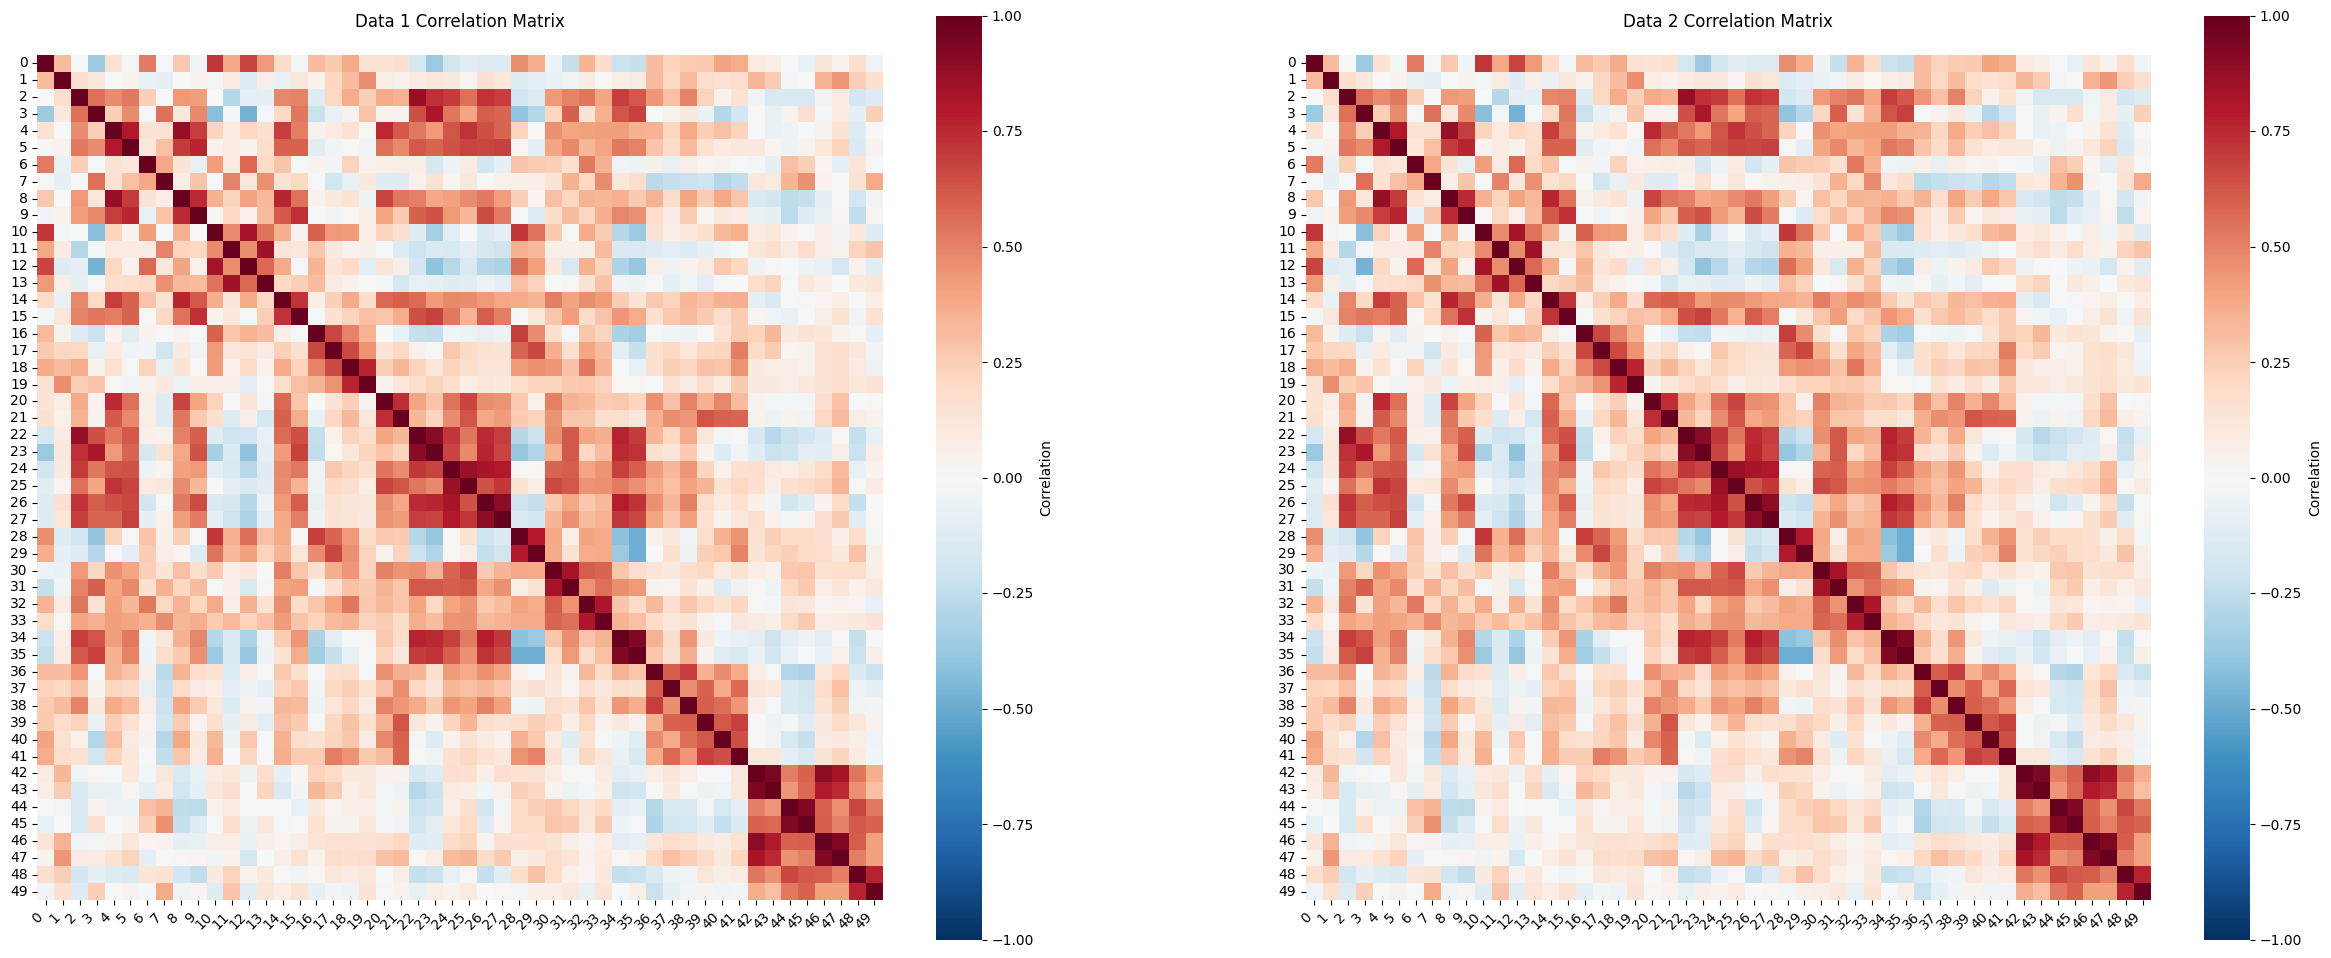

In [163]:
# Compute Coactivation (Correlation) Matrix
def compute_correlation_matrix(data):
    return data.corr()

correlation_matrix_1 = compute_correlation_matrix(data1)
correlation_matrix_2 = compute_correlation_matrix(data2)

fig, axes = plt.subplots(1, 2, figsize=(30, 12))
plot_correlation_matrix(correlation_matrix_1, "Data 1 Correlation Matrix", axes[0])
plot_correlation_matrix(correlation_matrix_2, "Data 2 Correlation Matrix", axes[1])

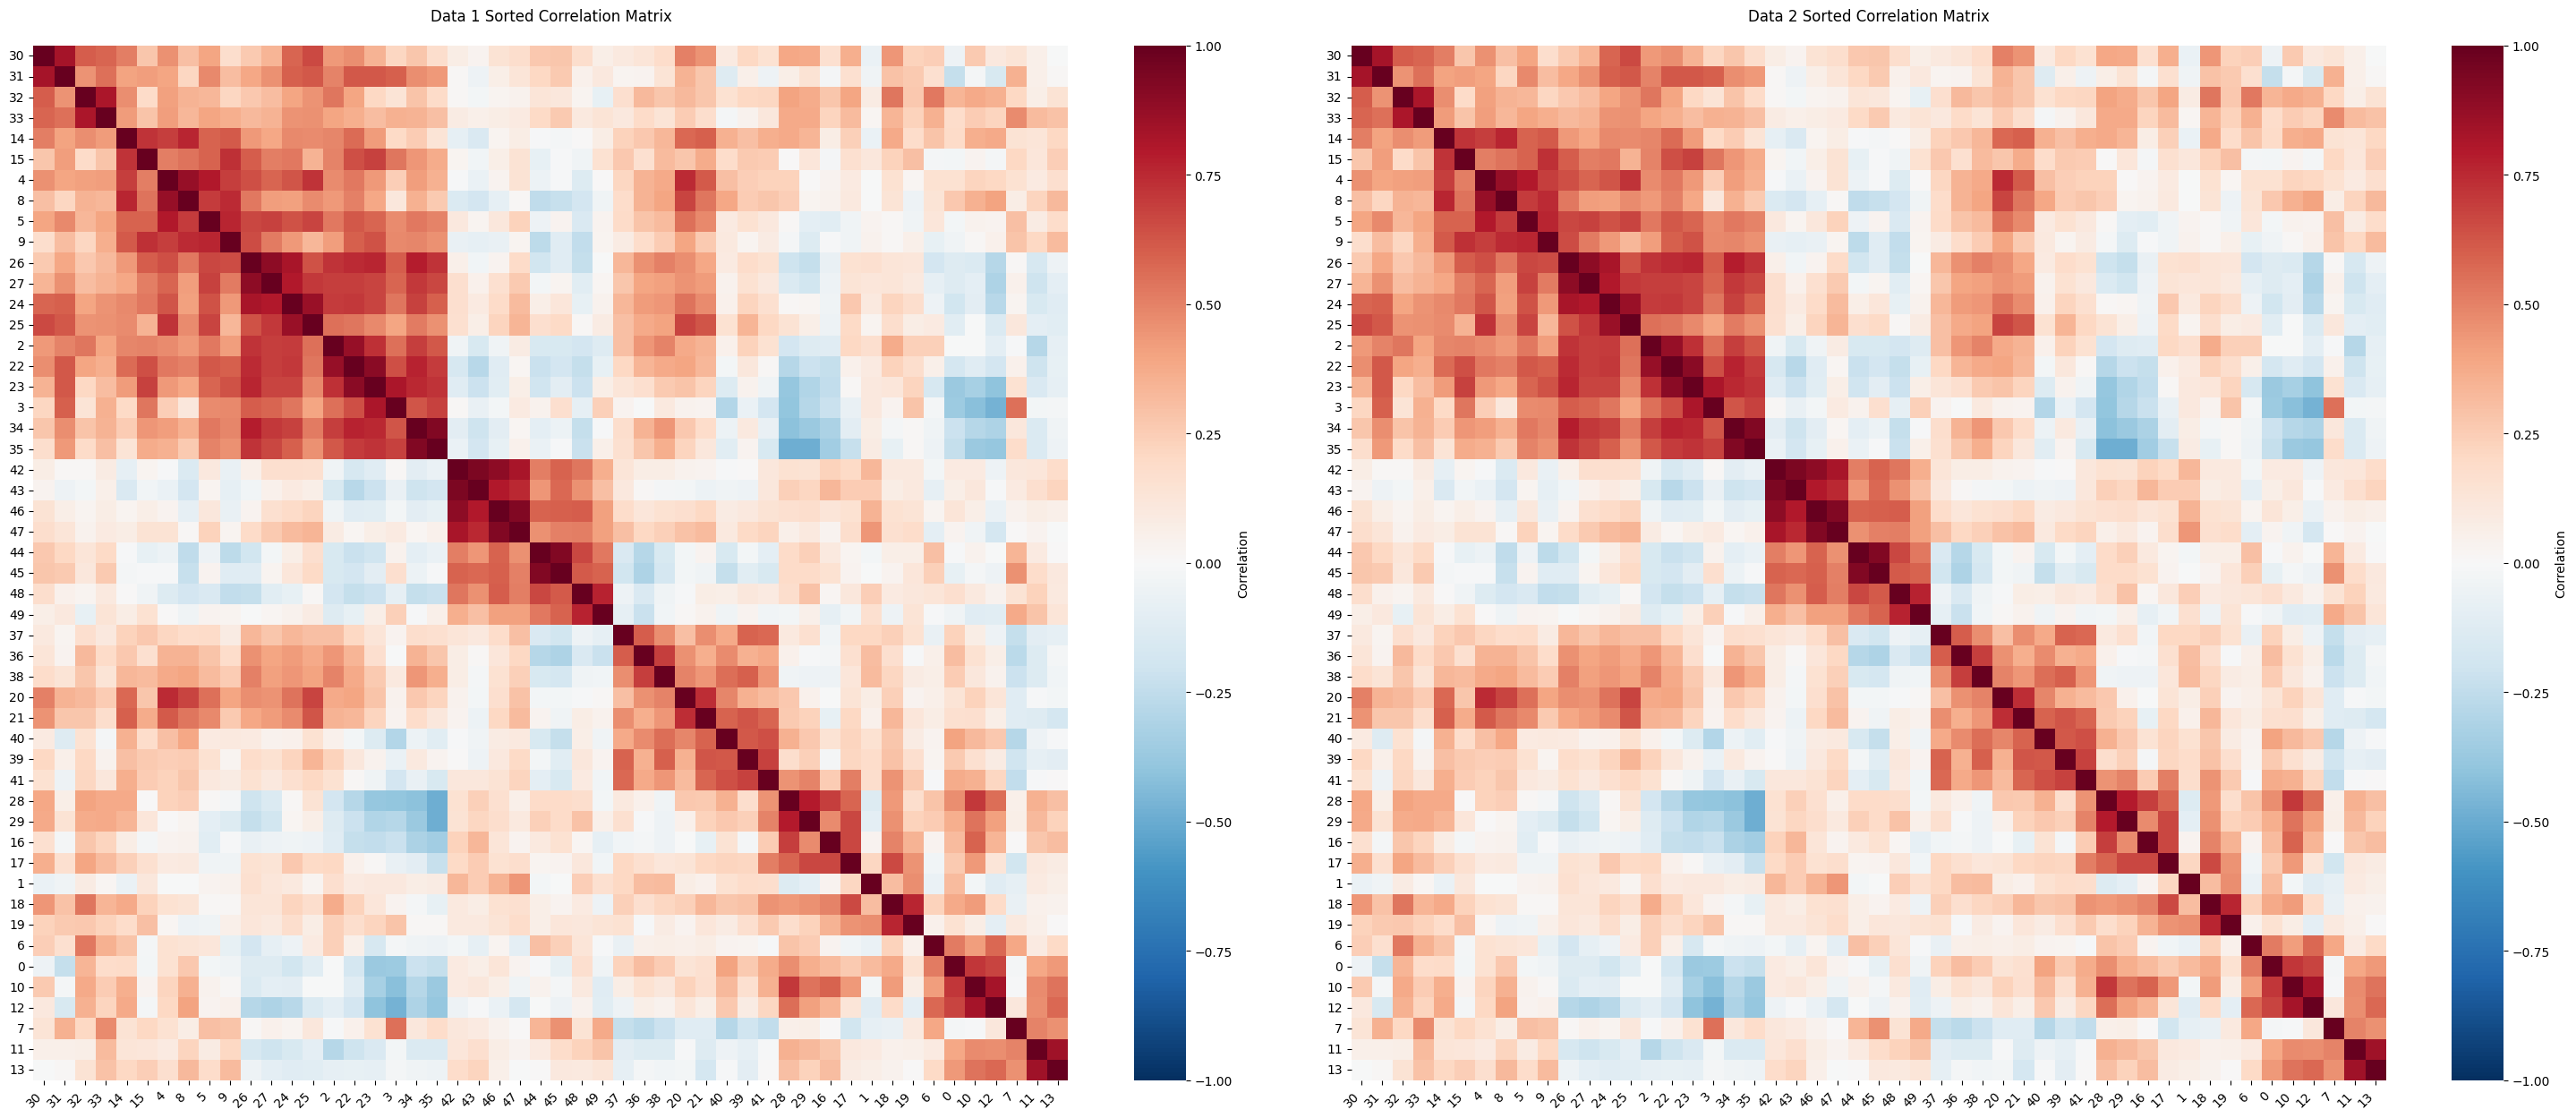

In [164]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

def sort_correlation_matrix(corr_matrix):
    dissimilarity = 1 - np.abs(corr_matrix)
    linkage = hierarchy.ward(squareform(dissimilarity))
    idx_order = hierarchy.leaves_list(linkage)
    sorted_matrix = corr_matrix.iloc[idx_order, idx_order]
    return sorted_matrix

fig, axes = plt.subplots(1, 2, figsize=(30, 12))
plot_correlation_matrix(sort_correlation_matrix(correlation_matrix_1), "Data 1 Sorted Correlation Matrix", axes[0])
plot_correlation_matrix(sort_correlation_matrix(correlation_matrix_2), "Data 2 Sorted Correlation Matrix", axes[1])
plt.tight_layout()

In [165]:
# Normalize Data (Bringing values between -1 and +1)
scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
data1_normalized = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)
data2_normalized = pd.DataFrame(scaler.fit_transform(data2), columns=data2.columns)

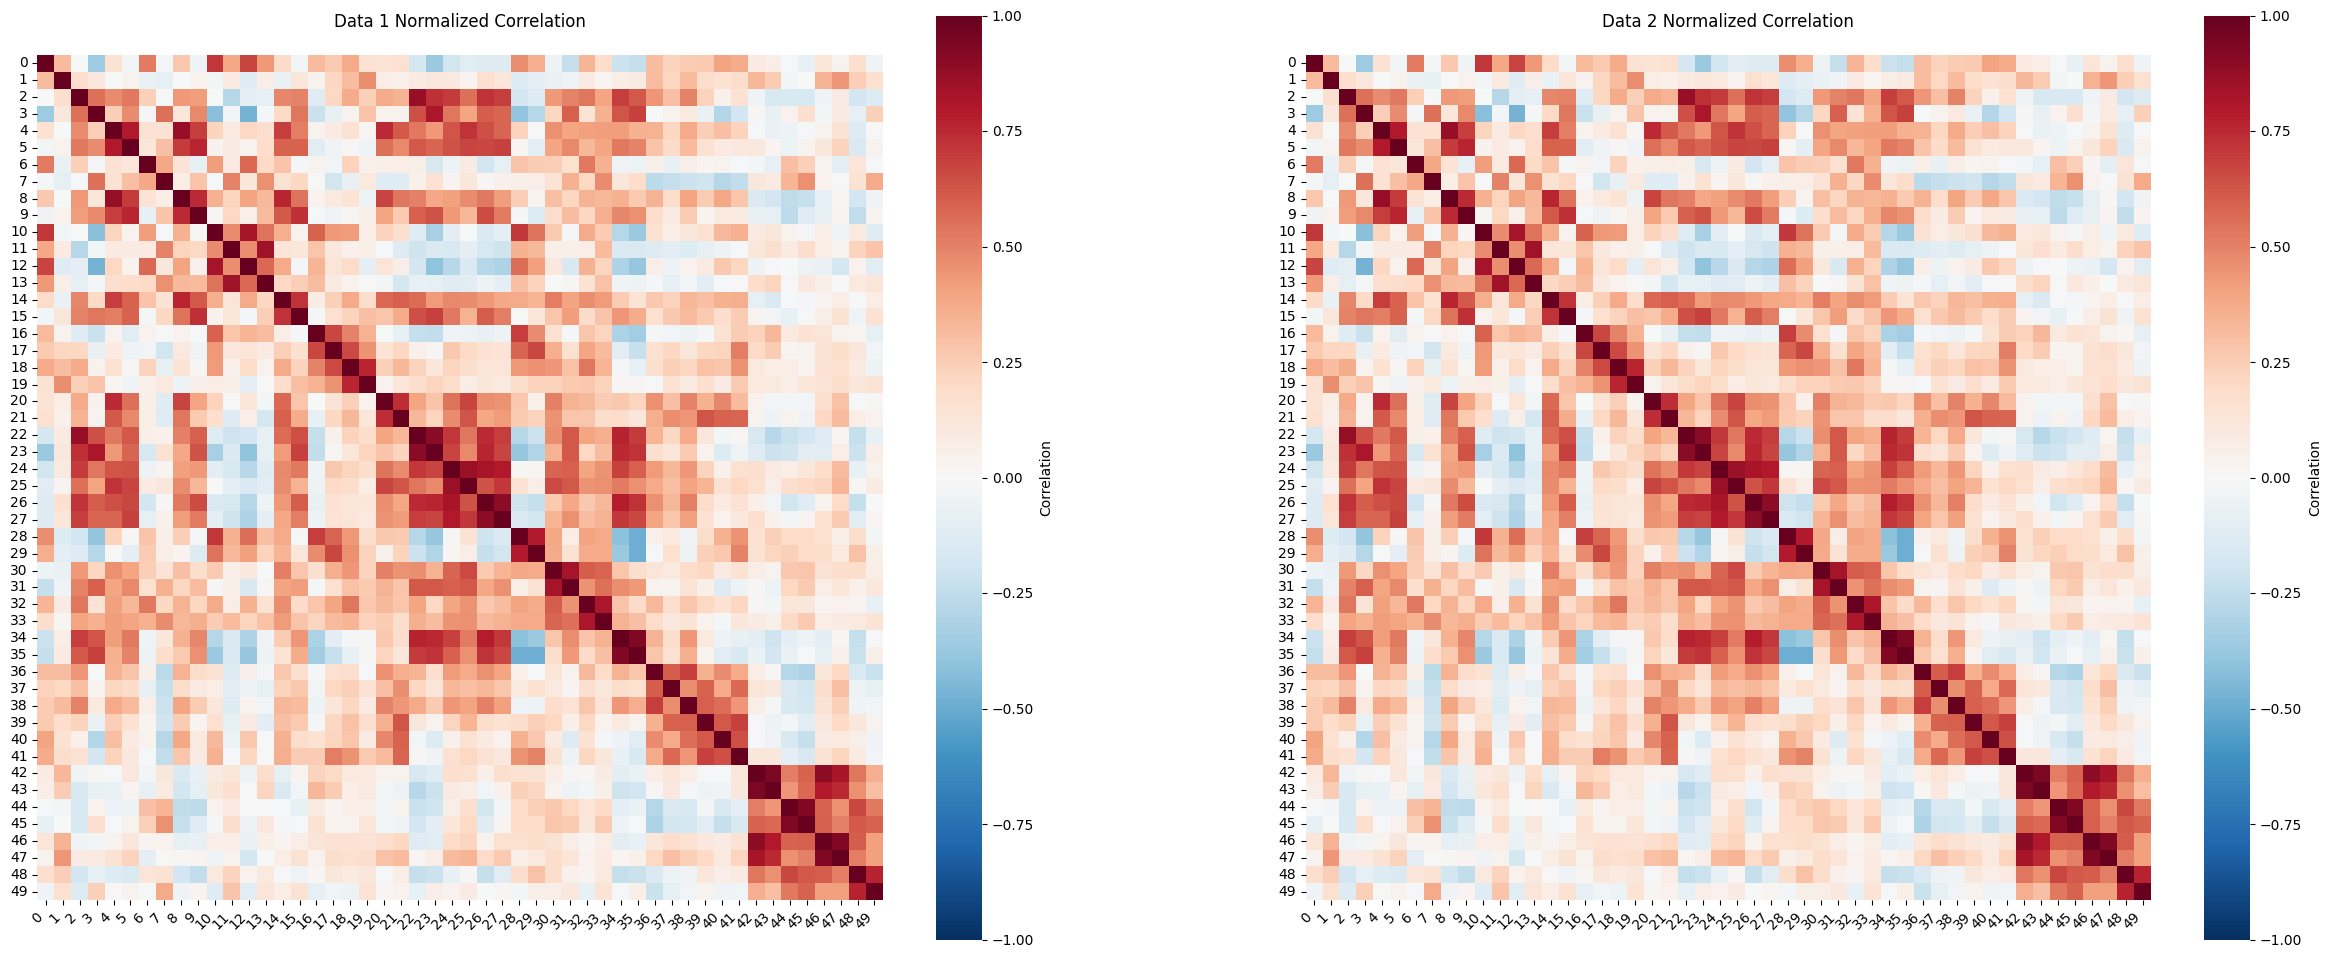

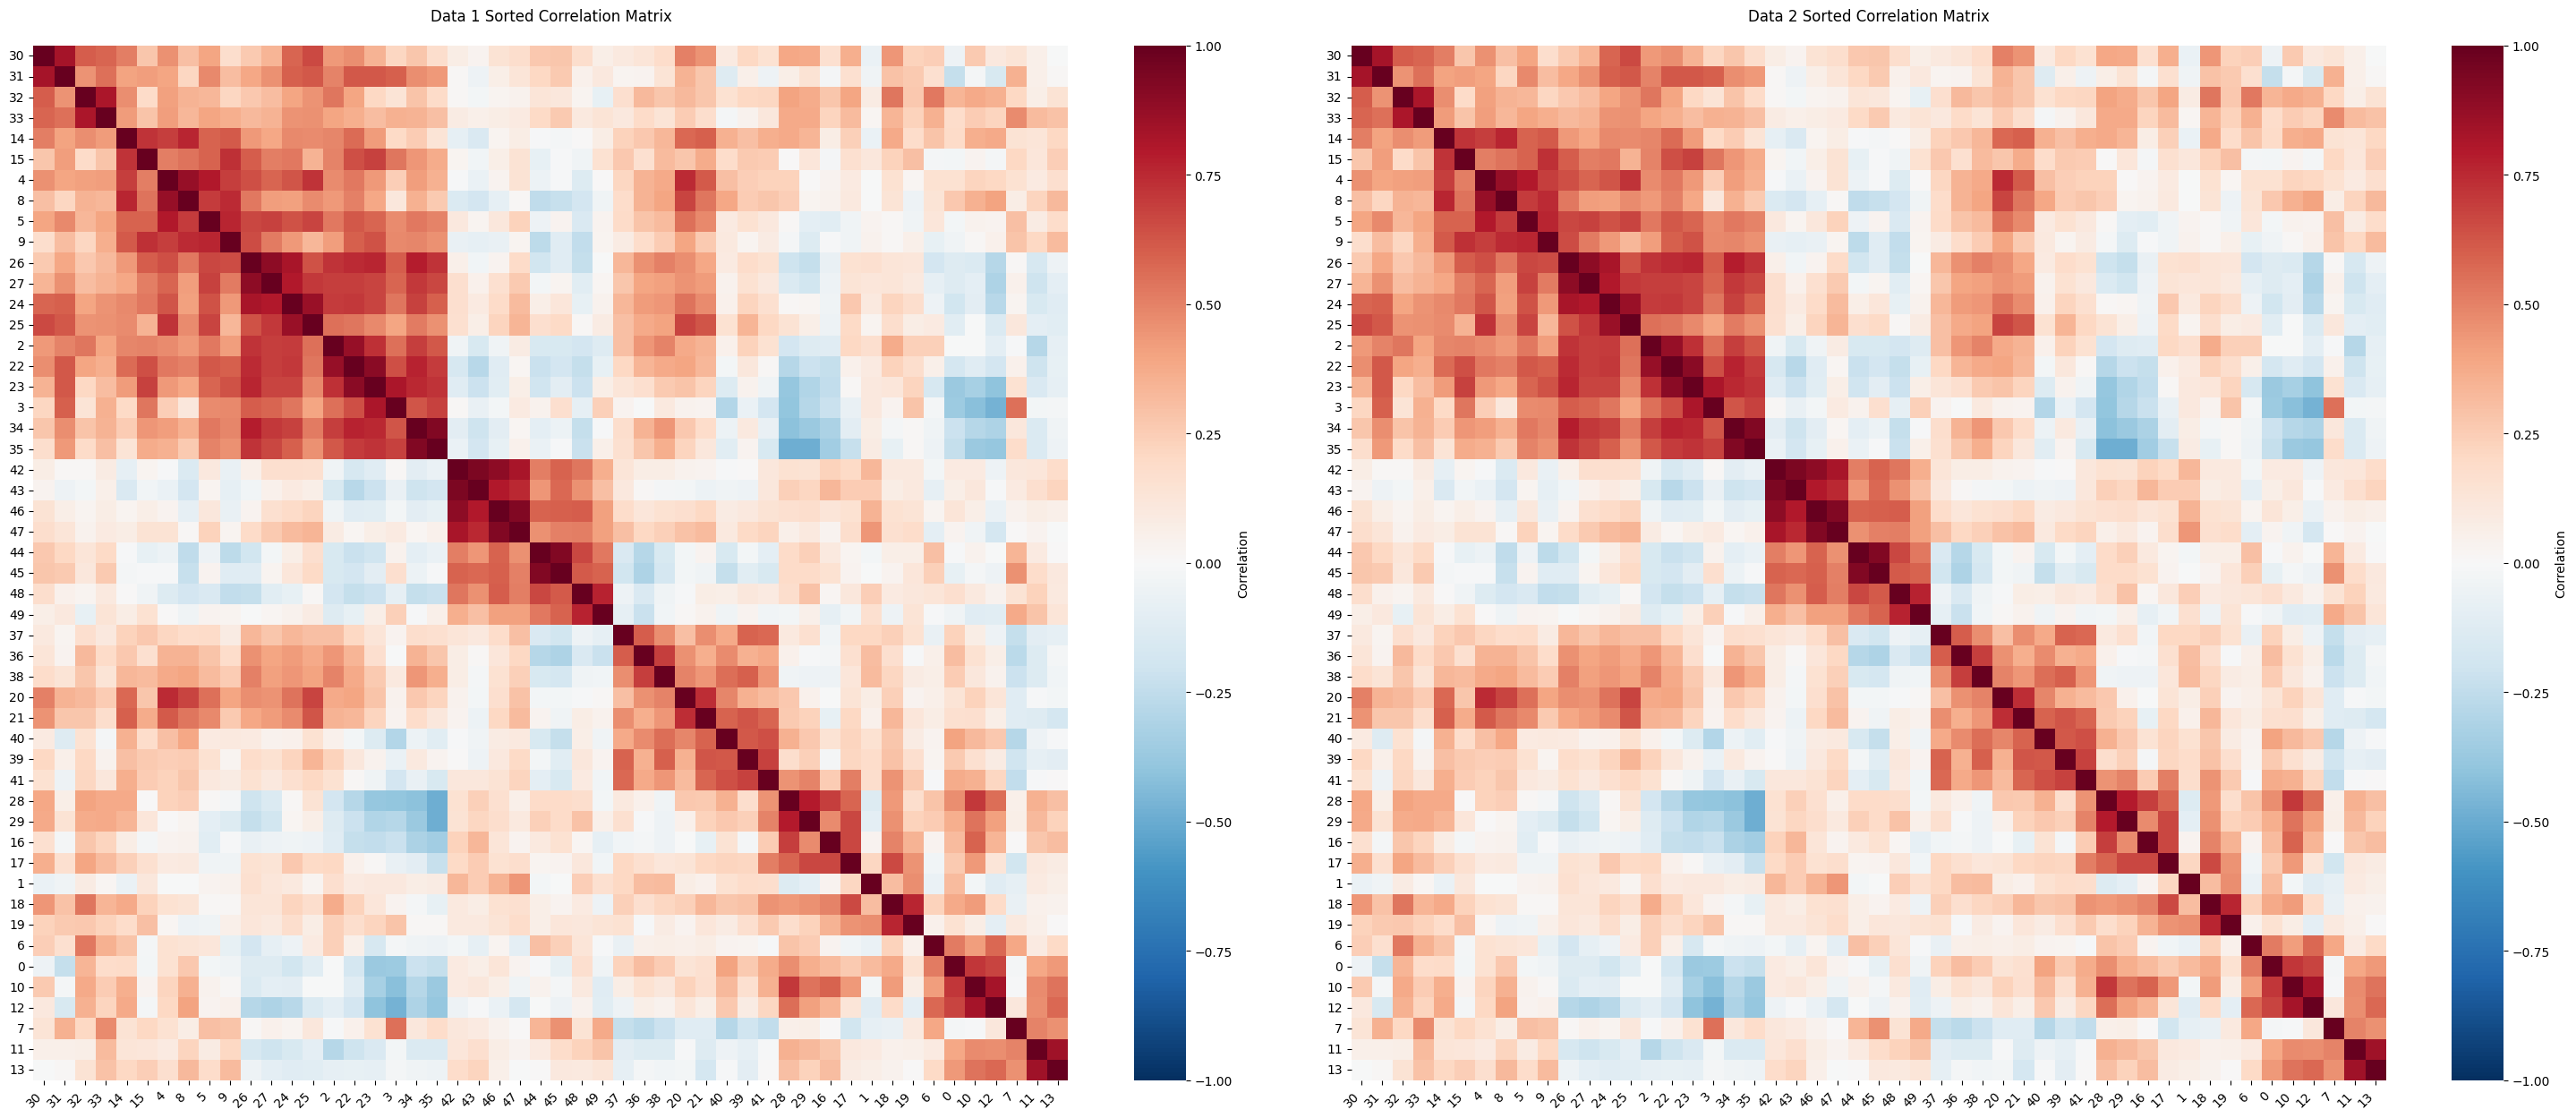

In [166]:
# Compute Correlation Matrix After Normalization
correlation_matrix_1_norm = (compute_correlation_matrix(data1_normalized))
correlation_matrix_2_norm = (compute_correlation_matrix(data2_normalized))

fig, axes = plt.subplots(1, 2, figsize=(30, 12))
plot_correlation_matrix(correlation_matrix_1_norm, "Data 1 Normalized Correlation", axes[0])
plot_correlation_matrix(correlation_matrix_2_norm, "Data 2 Normalized Correlation", axes[1])

fig, axes = plt.subplots(1, 2, figsize=(30, 12))
plot_correlation_matrix(sort_correlation_matrix(correlation_matrix_1_norm), "Data 1 Sorted Correlation Matrix", axes[0])
plot_correlation_matrix(sort_correlation_matrix(correlation_matrix_2_norm), "Data 2 Sorted Correlation Matrix", axes[1])
plt.tight_layout()

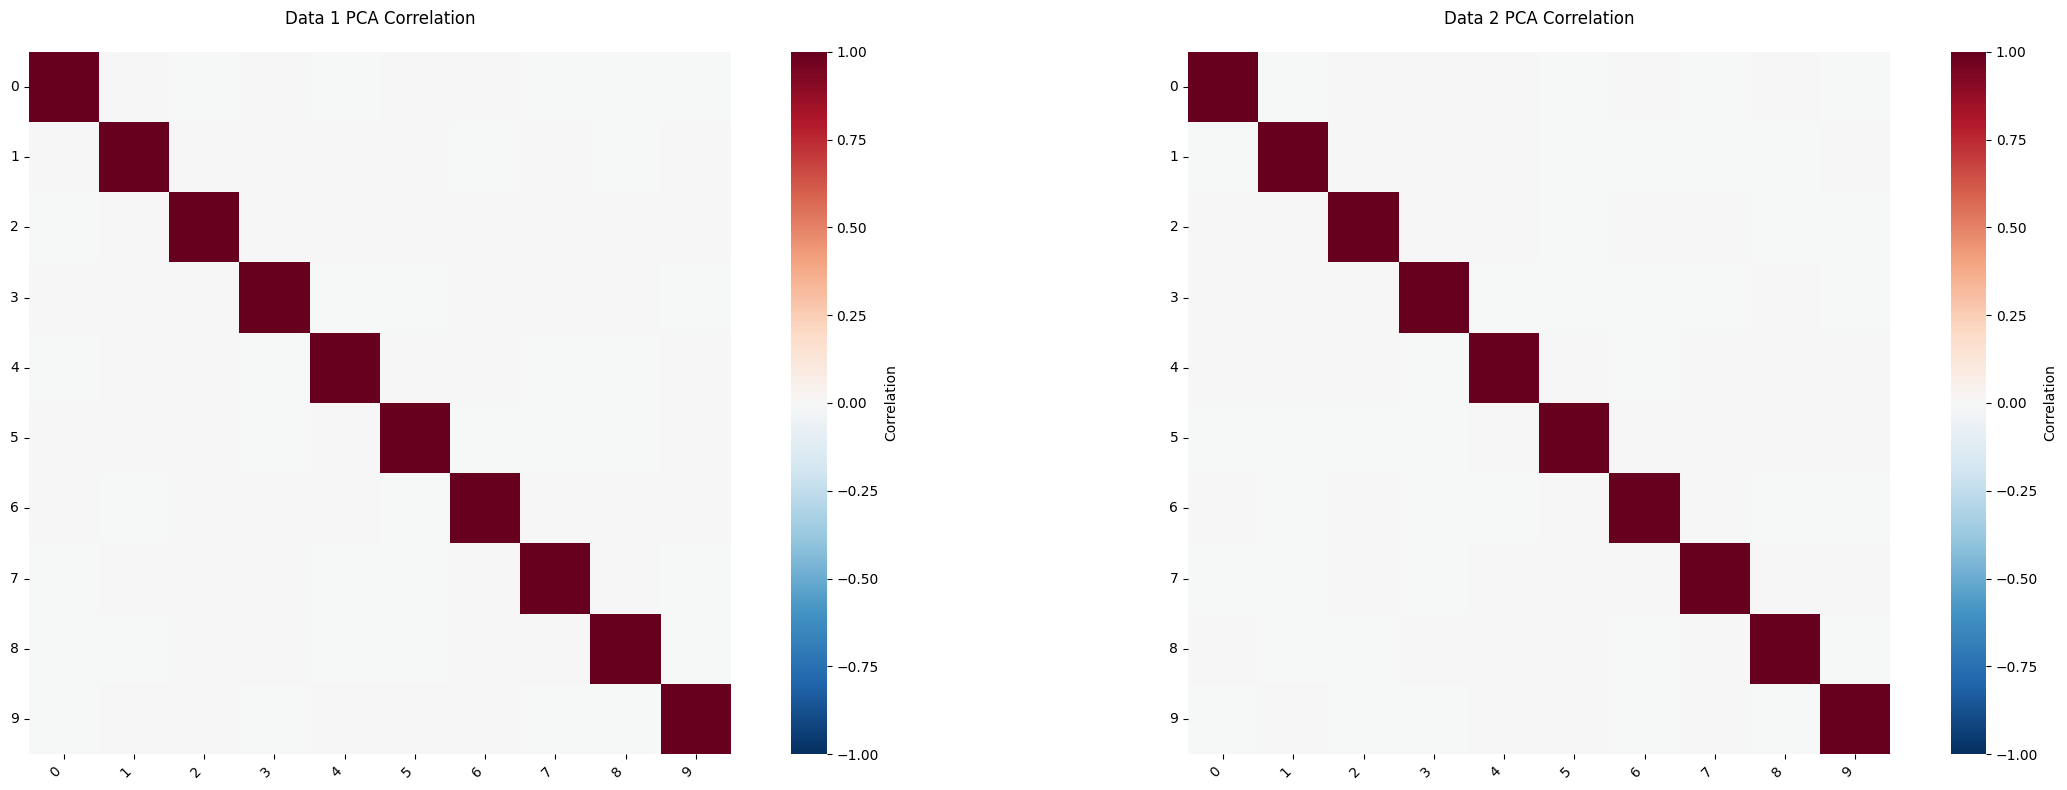

In [167]:
# Perform PCA to Reduce Dimensionality
pca = PCA(n_components=10)  # Reduce to 10 principal components
data1_pca = pd.DataFrame(pca.fit_transform(data1_normalized))
data2_pca = pd.DataFrame(pca.fit_transform(data2_normalized))
# print(data1_pca)
# Compute Correlation Matrix After PCA
correlation_matrix_1_pca = compute_correlation_matrix(data1_pca)
correlation_matrix_2_pca = compute_correlation_matrix(data2_pca)
# print(correlation_matrix_1_pca)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
plot_correlation_matrix(correlation_matrix_1_pca, "Data 1 PCA Correlation", axes[0])
plot_correlation_matrix(correlation_matrix_2_pca, "Data 2 PCA Correlation", axes[1])

plt.tight_layout()
plt.show()


# Question 2

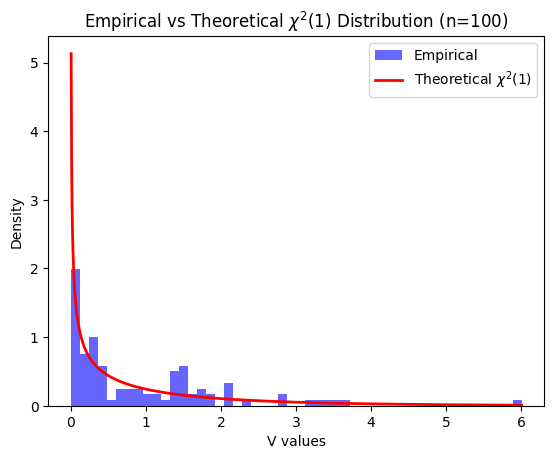

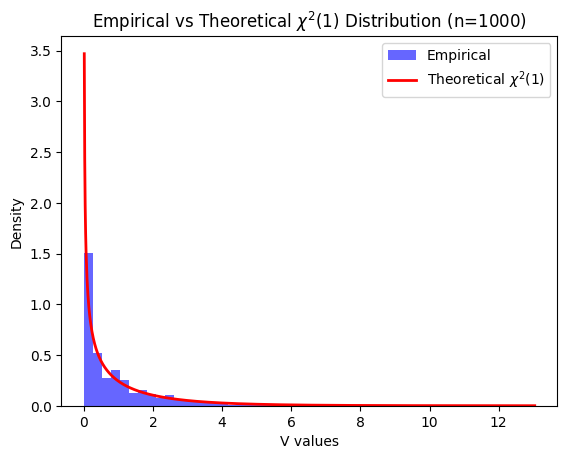

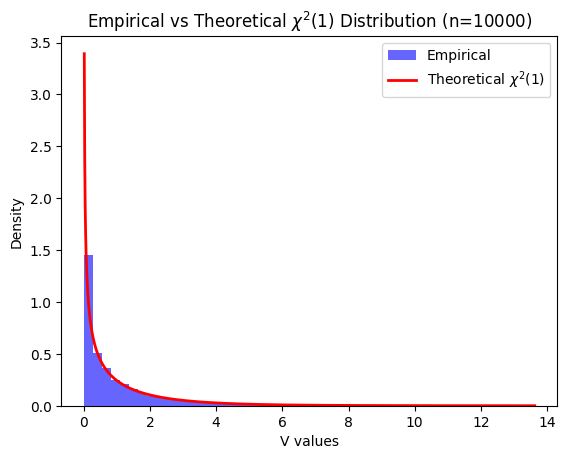

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def verify_chi_squared(n, mu=0, sigma=1):
    # Generate n samples from N(mu, sigma^2)
    X = np.random.normal(mu, sigma, n)

    # Compute V = (X - mu)^2 / sigma^2
    V = ((X - mu) ** 2) / (sigma ** 2)

    # Plot histogram of V
    plt.hist(V, bins=50, density=True, alpha=0.6, color='b', label='Empirical')

    # Plot theoretical chi-squared (df=1) distribution
    x = np.linspace(0, max(V), 1000)
    plt.plot(x, stats.chi2.pdf(x, df=1), 'r-', lw=2, label='Theoretical $\chi^2$(1)')

    plt.xlabel('V values')
    plt.ylabel('Density')
    plt.title(f'Empirical vs Theoretical $\chi^2$(1) Distribution (n={n})')
    plt.legend()
    plt.show()

# Run for different values of n
for n in [100, 1000, 10000]:
    verify_chi_squared(n)


# Question 3

Mean (μ): 49.8583
Variance (σ²): 111.7279
Standard Deviation (σ): 10.5701

Empirical Rule Verification:
Within 1σ: 68.40% (Expected: 68%)
Within 2σ: 95.20% (Expected: 95%)
Within 3σ: 99.90% (Expected: 99.7%)

Probability beyond 2σ: 0.0455


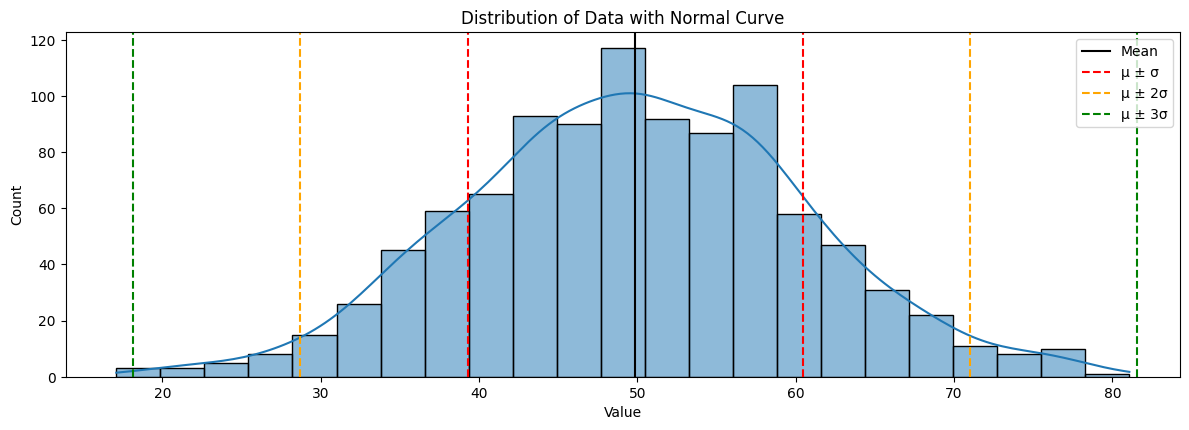

In [181]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_4/dataset_q3/gaussian_dataset_with_noise.csv"
data = pd.read_csv(url)
values = data.iloc[:, 0]

mean = np.mean(values)
variance = np.var(values, ddof=0)
std_dev = np.sqrt(variance)

within_1_sigma = np.mean((values >= mean - std_dev) & (values <= mean + std_dev)) * 100
within_2_sigma = np.mean((values >= mean - 2 * std_dev) & (values <= mean + 2 * std_dev)) * 100
within_3_sigma = np.mean((values >= mean - 3 * std_dev) & (values <= mean + 3 * std_dev)) * 100

prob_beyond_2_sigma = 1 - stats.norm.cdf(2, loc=0, scale=1) + stats.norm.cdf(-2, loc=0, scale=1)

print(f"Mean (μ): {mean:.4f}")
print(f"Variance (σ²): {variance:.4f}")
print(f"Standard Deviation (σ): {std_dev:.4f}")
print(f"\nEmpirical Rule Verification:")
print(f"Within 1σ: {within_1_sigma:.2f}% (Expected: 68%)")
print(f"Within 2σ: {within_2_sigma:.2f}% (Expected: 95%)")
print(f"Within 3σ: {within_3_sigma:.2f}% (Expected: 99.7%)")
print(f"\nProbability beyond 2σ: {prob_beyond_2_sigma:.4f}")

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.histplot(values, kde=True)
plt.title('Distribution of Data with Normal Curve')
plt.xlabel('Value')
plt.ylabel('Count')

plt.axvline(mean, color='black', linestyle='-', label='Mean')
plt.axvline(mean + std_dev, color='red', linestyle='--', label='μ ± σ')
plt.axvline(mean - std_dev, color='red', linestyle='--')
plt.axvline(mean + 2*std_dev, color='orange', linestyle='--', label='μ ± 2σ')
plt.axvline(mean - 2*std_dev, color='orange', linestyle='--')
plt.axvline(mean + 3*std_dev, color='green', linestyle='--', label='μ ± 3σ')
plt.axvline(mean - 3*std_dev, color='green', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()